### Thuật toán K-Means triển khai theo phương pháp EM

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Đặt seed để kết quả có thể tái tạo được
np.random.seed(42)

In [21]:
def k_means(data, k , max_iters = 100):
  centroids = data[np.random.choice(data.shape[0], k , replace = False)]

  for _ in range(max_iters):
    distances = np.array([np.sum((data - centroid) ** 2, axis = 1) for centroid in centroids])
    labels = np.argmin(distances, axis = 0)

    # Phân cụm các điểm dữ liệu rồi tính trung bình các điểm đó để ra new_centroids
    new_centroids = np.array([data[labels == i].mean(axis = 0) for i in range(k)])

    if np.all(centroids == new_centroids):
      break
    centroids = new_centroids
  return labels, centroids

## K-Means Clustering

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

Tạo dữ liệu

In [22]:
# Define các tham số của phân phối Gauss
mean_1 = [2,2]
mean_2 = [8,3]
mean_3 = [3,6]
cov_1 = [[1,0], [0,1]]

data_1 = np.random.multivariate_normal(mean_1,cov_1,200)
data_2 = np.random.multivariate_normal(mean_2,cov_1,200)
data_3 = np.random.multivariate_normal(mean_3,cov_1,200)

dataset_1 = np.vstack((data_1,data_2,data_3)) # Gộp dữ liệu thành 1 tập duy nhất

In [23]:
k = 3
labels_1, centroids_1 = k_means(dataset_1,k,max_iters = 100)

#### Trực quan hóa dữ liệu

In [30]:
import matplotlib.pyplot as plt

def plot_clusters(dataset1, labels_1, centroids):
    plt.scatter(dataset1[:, 0], dataset1[:, 1], c=labels_1, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.title('Kết quả khi trực quan:')
    plt.xlabel('Trục X')
    plt.ylabel('Trục Y')
    plt.legend()
    plt.show()

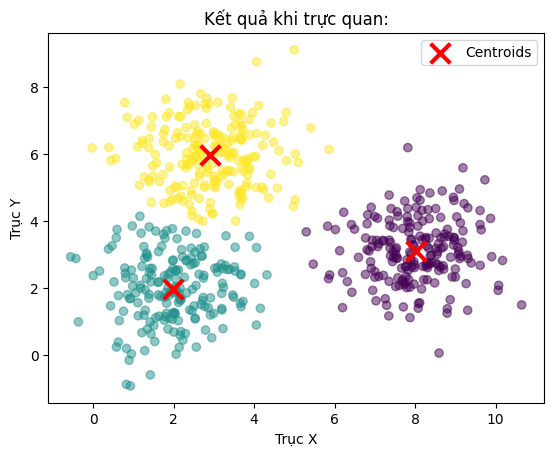

In [31]:
plot_clusters(dataset_1, labels_1, centroids_1)

#### Nhận xét tác động của việc khởi tạo ngẫu nhiên đến hiệu suất tổng thể của K-means

* Về kết quả trực quan: Quan sát biểu đồ cho thấy thuật toán đã phân tách thành công các cụm dữ liệu. Các tâm cụm (centroids) được xác định chính xác tại các khu vực có mật độ điểm cao nhất, khớp với cấu trúc phân tán thực tế của tập dữ liệu.

* Về ảnh hưởng của khởi tạo: Hiệu quả của K-means phụ thuộc mật thiết vào bước khởi tạo tâm cụm ban đầu. Việc chọn vị trí ngẫu nhiên tiềm ẩn rủi ro khiến thuật toán rơi vào các "bẫy" tối ưu cục bộ (local optima). Trong những trường hợp đó, tâm cụm không thể di chuyển đến vị trí lý tưởng, gây ra hiện tượng phân tách không chính xác dù các cụm dữ liệu thực tế vốn rất tách biệt.

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma =
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

Tạo dữ liệu

In [46]:
# Định nghĩa các tham số
data_4 = np.random.multivariate_normal(mean_1,cov_1,50)
data_5 = np.random.multivariate_normal(mean_2,cov_1,20)
data_6 = np.random.multivariate_normal(mean_3,cov_1,1000)

dataset_2 = np.vstack((data_4,data_5,data_6)) # Gộp dữ liệu thành 1 tập

In [47]:
labels_2, centroids_2 = k_means(dataset_2,k,max_iters = 100)

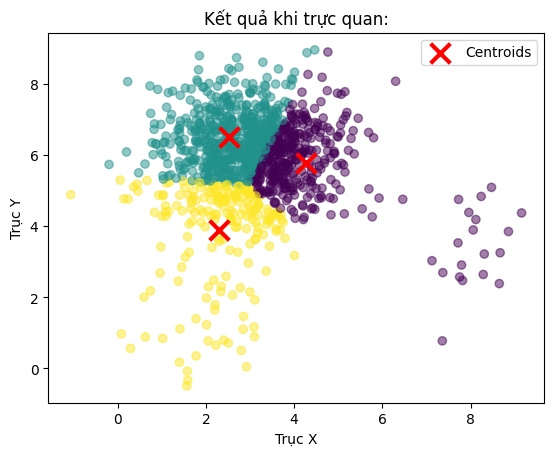

In [49]:
plot_clusters(dataset_2, labels_2, centroids_2)

#### Nhận xét tác động của kích thước khác nhau giữa các cụm đến hiệu suất của K-Means

* **Về phân bố dữ liệu:** Tập dữ liệu thể hiện sự chênh lệch cực đoan về mật độ điểm giữa các nhóm. Trong khi cụm lớn màu xanh lá chiếm ưu thế tuyệt đối về số lượng điểm (1000 điểm), hai cụm còn lại là vàng và tím có quy mô rất nhỏ (50 và 20 điểm), tạo nên một cấu trúc dữ liệu mất cân bằng nghiêm trọng.

* **Về hạn chế của thuật toán:** K-means bộc lộ nhược điểm lớn khi đối mặt với dữ liệu không đồng nhất về kích thước. Do mục tiêu của thuật toán là cực tiểu hóa tổng bình phương sai số (SSE) trên toàn tập dữ liệu, cụm có số lượng điểm lớn sẽ tạo ra "trọng lực" mạnh hơn, kéo tâm cụm về phía nó. Kết quả là ranh giới phân cụm bị đẩy lệch, khiến các cụm nhỏ bị lấn át hoặc bị gộp sai vào các phân vùng của cụm lớn nhằm đạt được mức sai số tổng thể thấp nhất.




### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where

$$
    \Sigma_1 =
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$

and

$$
\Sigma_2 =
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

Tạo dữ liệu

In [39]:
# Tạo dữ liệu với phương sai mới
cov_2 = [[10,0], [0,1]] # Phương sai mới
data_7 = np.random.multivariate_normal(mean_1,cov_1,200)
data_8 = np.random.multivariate_normal(mean_2,cov_1,200)
data_9 = np.random.multivariate_normal(mean_3,cov_2,200)

dataset_3 = np.vstack((data_7,data_8,data_9))

In [40]:
labels_3, centroids_3 = k_means(dataset_3,k,max_iters = 100)

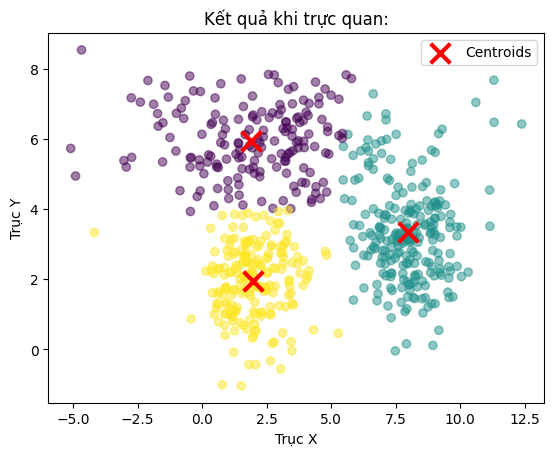

In [45]:
plot_clusters(dataset_3, labels_3, centroids_3)

#### Nhận xét tác động của phân phối Gaussian $\mathcal{N}((3, 6), \Sigma_2)$ đến hiệu suất của K-means


*  Phân phối Gaussian với mean (3, 6) và ma trận hiệp phương sai cov_2 = [[10, 0], [0, 1]] tạo ra một cụm có phương sai lớn hơn nhiều trên trục X (10) so với trục Y (1). Điều này có nghĩa là cụm (màu tím, gần mean [3, 6]) sẽ trải rộng hơn theo chiều ngang (trục X) và hẹp hơn theo chiều dọc (trục Y), tạo hình dạng elip dẹt theo hướng ngang.

*  K-means giả định các cụm có hình dạng hình cầu và phương sai đồng nhất giữa các chiều. Tuy nhiên, cụm màu tím có hình dạng elip dẹt (do phương sai trên trục X lớn hơn nhiều), điều này làm K-means gặp khó khăn trong việc phân cụm chính xác. Trong hình, tâm cụm (dấu X đỏ) của cụm tím không nằm ở vị trí tối ưu, và một phần điểm của cụm tím có thể bị gán nhầm vào cụm màu vàng hoặc xanh do sự chồng lấn và hình dạng không đối xứng.

*   Hiệu suất của K-means giảm vì thuật toán không thể xử lý tốt các cụm có hình dạng elip hoặc phương sai khác nhau giữa các chiều.
